In [1]:
"""
Made for kavli, to plot drawings of single prims (basis set)
"""

'\nMade for kavli, to plot drawings of single prims (basis set)\n'

In [3]:
from pythonlib.tools.plottools import savefig
from pythonlib.dataset.dataset_analy.primitives import *
from pythonlib.dataset.dataset_preprocess.primitives import *
from pythonlib.dataset.dataset import Dataset, load_dataset, load_dataset_daily_helper
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:

animal = "Pancho"
date = "220918"
D = load_dataset_daily_helper(animal, date)


Searching using this string:
/home/lucast4/code/drawmonkey/expt_metadat/*220918-*Pancho.**
Found this many paths:
0
Searching using this string:
/home/lucast4/code/drawmonkey/expt_metadat_daily/*220918-*Pancho.**
Found this many paths:
1
---
/home/lucast4/code/drawmonkey/expt_metadat_daily/priminvar4-220918-Pancho.yaml
Loading this dataset Pancho priminvar4 220918
Searching using this string:
/gorilla1/analyses/database/*Pancho-*priminvar4-*220918-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/gorilla1/analyses/database/BEH/*Pancho-*priminvar4-*220918-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/gorilla1/analyses/database/BEH/Pancho-priminvar4-220918-230101_172715
Searching using this string:
/mnt/Freiwald/kgupta/analyses/database/*Pancho-*priminvar4-*220918-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/mnt/Freiwald/kgupta/analyses/database/BEH/*Pancho-*

In [22]:
WHICH_TASK_KIND = "prims_single"


In [23]:
D.Dat = D.Dat[D.Dat["task_kind"] == WHICH_TASK_KIND].reset_index(drop=True)

# Preprocessing
if WHICH_TASK_KIND=="character":
    # characters, be more leneint
    params = ["remove_online_abort"]
    frac_touched_min = None 
elif WHICH_TASK_KIND=="prims_single":
    params = ["remove_online_abort", "frac_touched_ok"]
    frac_touched_min = 0.6    
elif WHICH_TASK_KIND=="prims_on_grid":
    params = ["one_to_one_beh_task_strokes"]
    frac_touched_min = None 
else:
    print(WHICH_TASK_KIND)
    assert False

D.preprocessGood(params=params, frac_touched_min=frac_touched_min)



-- Len of D, before applying this param: remove_online_abort, ... 930
after: 820
-- Len of D, before applying this param: frac_touched_ok, ... 820
after: 820


['remove_online_abort', 'frac_touched_ok']

In [24]:
#### GEnerate DS
from pythonlib.dataset.dataset_strokes import DatStrokes
DS = DatStrokes(D)

stored in self.Dat[BehClass]
0
200
400
600
800
Running D.behclass_tokens_extract_datsegs
0
200
400
600
800
Removing these trials: 
[]
self.Dat starting legnth:  820
Modified self.Dat, keeping only the inputted inds
self.Dat final legnth:  820
Success! all gridloc identical!
These are the x and y mappings, gridloc:loc
x... {1: 1.7, 0: -1.6}
y... {0: -1.6, 1: 1.7}
0
100
200
300
400
500
600
700
800
This many strokes extracted:  820
Appended character to self.Dat


### PLOTS

In [26]:
DS.Dat["strok"]

0      [[162.00425619144377, -100.9874854544857, 3.69...
1      [[-147.2691998193787, 212.05170564859066, 3.52...
2      [[232.24847764085868, 27.10089288294083, 3.714...
3      [[-109.99487621644798, 326.968863727884, 3.766...
4      [[-154.96849771829906, -105.01170071059552, 3....
                             ...                        
815    [[221.97634001968925, -80.98140709063507, 3.98...
816    [[176.9731653028355, 342.5216976153852, 3.632]...
817    [[200.9820143020781, 230.14211376553814, 3.75]...
818    [[150.1954765282636, 208.28031436749308, 3.632...
819    [[-137.99387027669445, 327.9277398139041, 3.63...
Name: strok, Length: 820, dtype: object

(<Figure size 3400x750 with 51 Axes>, <Figure size 3400x750 with 51 Axes>)

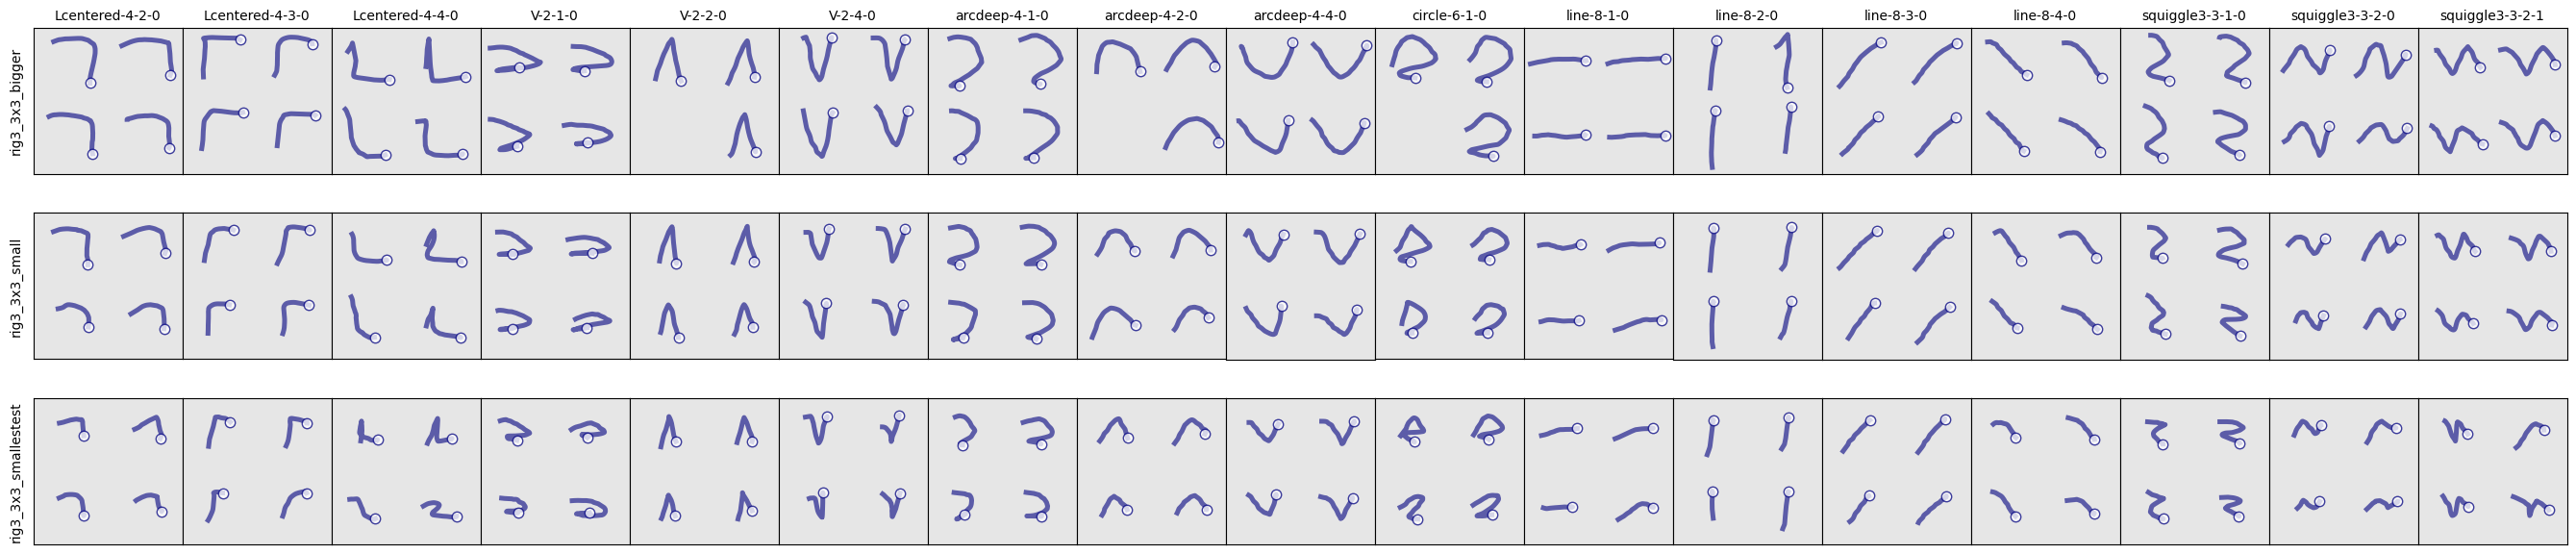

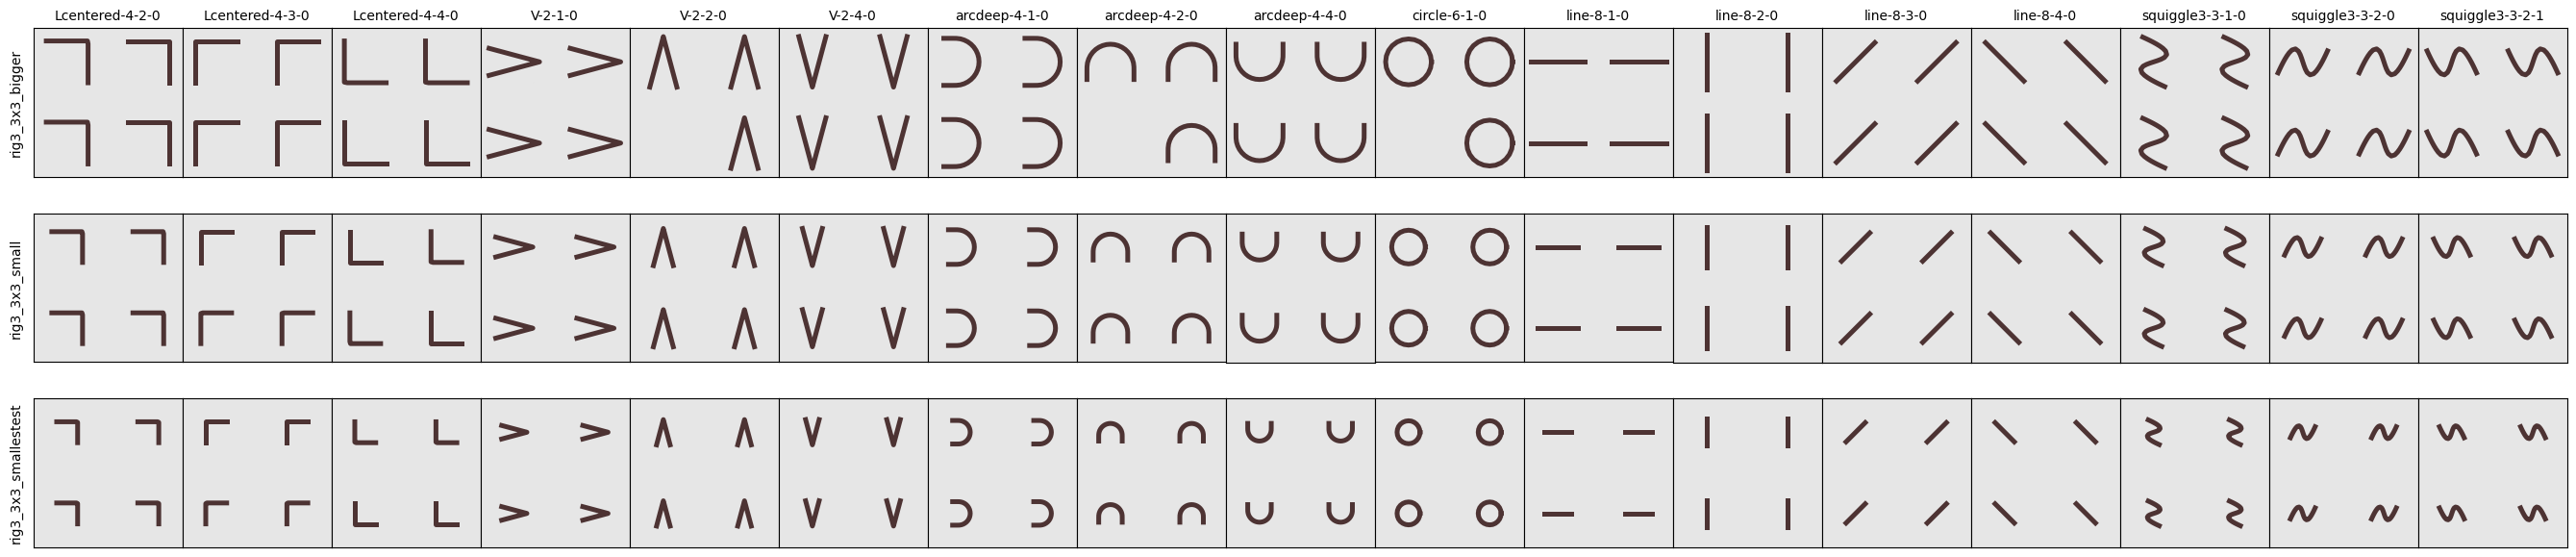

In [76]:
fig_beh, fig_task = DS.plotshape_row_col_size_loc()

In [139]:
from pythonlib.dataset.dataset_analy.singleprims import preprocess_dataset
preprocess_dataset(D, PLOT=True)

SAVING at:  /gorilla1/analyses/main/singleprims/Pancho_priminvar4_220918
Removing these trials: 
[]
self.Dat starting legnth:  820
Modified self.Dat, keeping only the inputted inds
self.Dat final legnth:  820
Success! all gridloc identical!
These are the x and y mappings, gridloc:loc
x... {1: 1.7, 0: -1.6}
y... {0: -1.6, 1: 1.7}
0
100
200
300
400
500
600
700
800
This many strokes extracted:  820
Appended character to self.Dat
Got these LIST_VAR and LIST_VARS_CONJUNCTION:
['gridsize', 'seqc_0_shape', 'seqc_0_loc']
[['seqc_0_loc', 'seqc_0_shape'], ['seqc_0_loc', 'gridsize'], ['gridsize', 'seqc_0_shape']]
Got these LIST_VAR and LIST_VARS_CONJUNCTION:
['gridsize', 'seqc_0_shape', 'seqc_0_loc']
[['seqc_0_loc', 'seqc_0_shape'], ['seqc_0_loc', 'gridsize'], ['gridsize', 'seqc_0_shape']]
stored in self.Dat[BehClass]
0
200
400
600
800
Running D.behclass_tokens_extract_datsegs
0
200
400
600
800
Done!, new len of dataset 820
stored in self.Dat[BehClass]
0
200
400
600
800
Running D.behclass_tokens_

(<pythonlib.dataset.dataset_strokes.DatStrokes at 0x7f8aac887d30>,
 '/gorilla1/analyses/main/singleprims/Pancho_priminvar4_220918')

##### Plot basis set

In [137]:
WHICH_BASIS = "Diego"
WHICH_SHAPES = "Pancho"
dfbasis, list_strok_basis, list_shape_basis, sdir= DS.stroke_shape_cluster_database_load_helper(WHICH_BASIS, which_shapes=WHICH_SHAPES,
                                                                                                return_sdir=True)

Basis set of strokes: ['Lcentered-4-2-0', 'Lcentered-4-3-0', 'Lcentered-4-4-0', 'V-2-1-0', 'V-2-2-0', 'V-2-4-0', 'arcdeep-4-1-0', 'arcdeep-4-2-0', 'arcdeep-4-4-0', 'circle-6-1-0', 'line-8-1-0', 'line-8-2-0', 'line-8-3-0', 'line-8-4-0', 'squiggle3-3-1-0', 'squiggle3-3-2-0', 'squiggle3-3-2-1']
Basis set of strokes: ['Lcentered-4-2-0', 'Lcentered-4-3-0', 'Lcentered-4-4-0', 'V-2-1-0', 'V-2-2-0', 'V-2-4-0', 'arcdeep-4-1-0', 'arcdeep-4-2-0', 'arcdeep-4-4-0', 'circle-6-1-0', 'line-8-1-0', 'line-8-2-0', 'line-8-3-0', 'line-8-4-0', 'squiggle3-3-1-0', 'squiggle3-3-2-0', 'squiggle3-3-2-1']


In [135]:
print(sdir)

/mnt/Freiwald/kgupta/analyses/database/STROKES/Diego-primsingridrand6b-230223


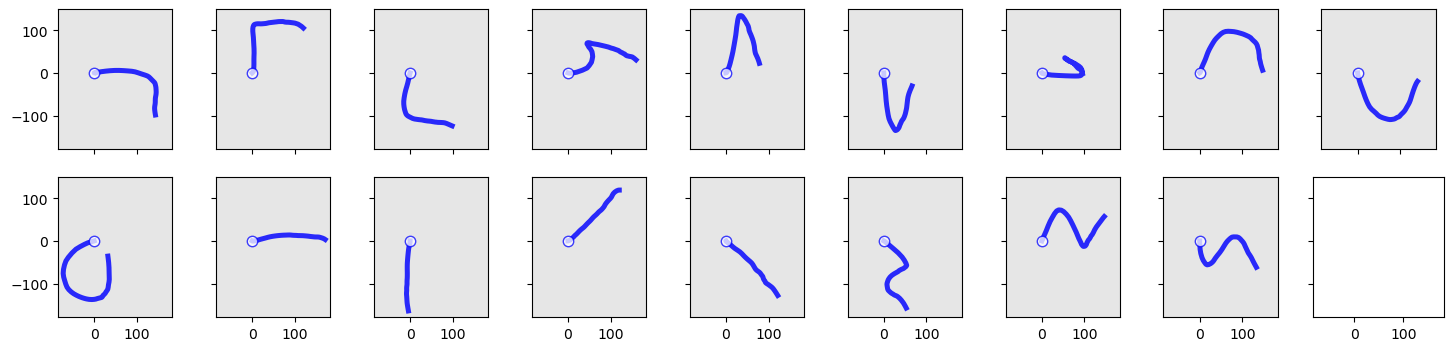

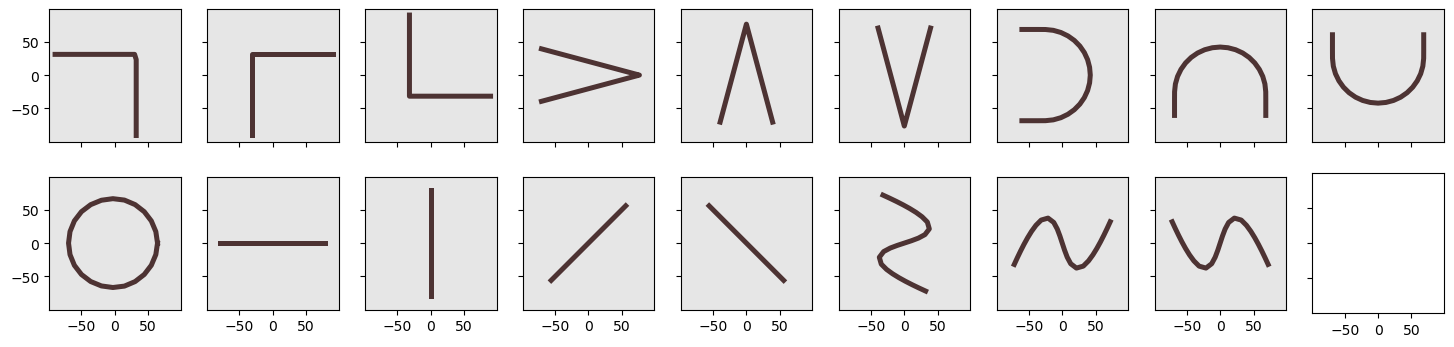

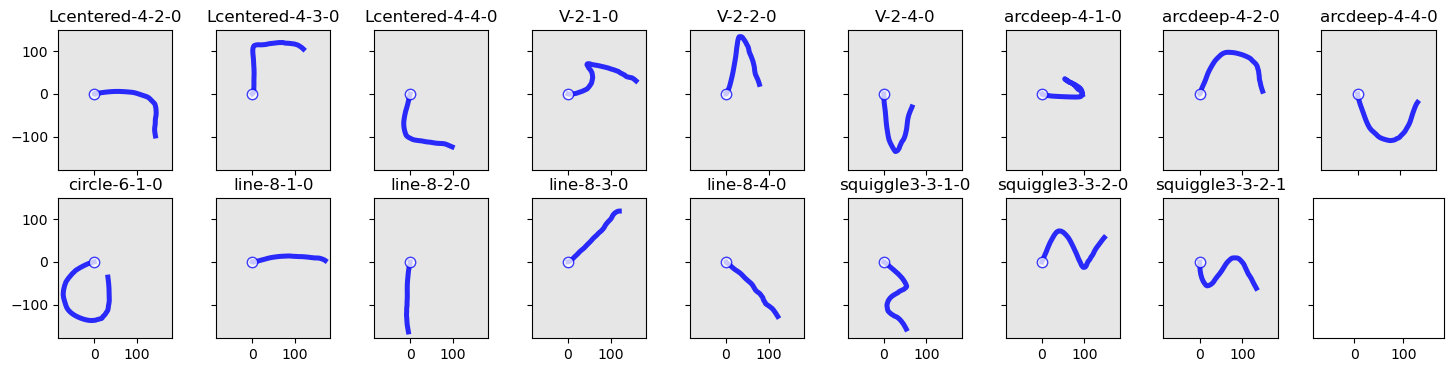

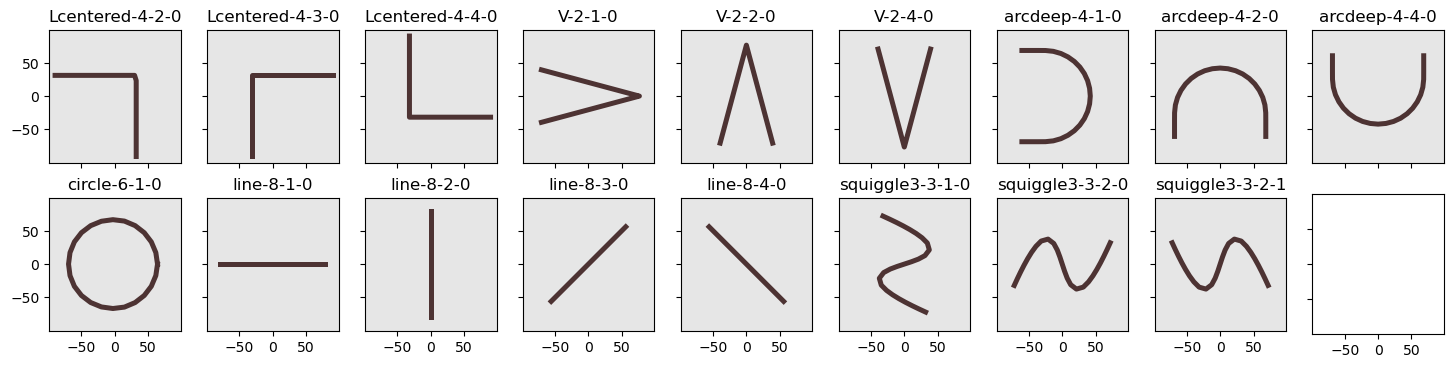

In [138]:
# sort by name of prim
dfdat = dfbasis.sort_values("shape")
list_strok = dfbasis["strok"].tolist()
list_shape = dfbasis["shape"].tolist()
# centerize task strokes, otherwise they are in space
list_strok_task = dfbasis["strok_task"].tolist()
list_strok_task = [x-np.mean(x, axis=0, keepdims=True) for x in list_strok_task]

for i, titles in enumerate([None, list_shape]):
    fig, axes = DS.plot_multiple_strok(list_strok, overlay=False, ncols=9, titles=titles);
    savefig(fig, f"{sdir}/mean_stroke_each_shape-which_shapes_{WHICH_SHAPES}-{i}-BEH.pdf")

    fig, axes = DS.plot_multiple_strok(list_strok_task, ver="task", overlay=False, ncols=9, titles=titles);
    savefig(fig, f"{sdir}/mean_stroke_each_shape-which_shapes_{WHICH_SHAPES}-{i}-TASK.pdf")
